- Mohammed Ghori
- Data Mining for Business Intelligence Section 01

In [8]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [9]:
import sqlite3

Dataset: https://www.kaggle.com/wyattowalsh/basketball

In [10]:
conect = sqlite3.connect(r"/Users/mohammedghori/Downloads/archive/basketball.sqlite")

In [11]:
conect

Idea: 
- Predict how likely a team is to win a game based on various simple counting statistics at halftime.
    Many sports betting websites now allow players to place bets at halftime. With a small sample of data generated from the first half of the game, it may be wise to use this data as a "training set" to predict how the second half of the game would play out. Doing so can have applications in sports betting by being able to accurately predict a winner from halftime.


In [12]:
# SQL Query
dfhome = pd.read_sql("SELECT WL_HOME,WL_Away,PTS_QTR1_HOME,PTS_QTR2_HOME, PTS_QTR1_AWAY,PTS_QTR2_AWAY, AST_HOME, AST_AWAY, DREB_HOME, DREB_AWAY, OREB_HOME, OREB_AWAY, STL_HOME, STL_AWAY, FTA_HOME, FTA_AWAY, BLK_HOME, BLK_AWAY, TOV_HOME, TOV_AWAY FROM Game WHERE SEASON_ID >= '22018'", con = conect)

In [13]:
dfhome.head()

,WL_HOME,WL_AWAY,PTS_QTR1_HOME,PTS_QTR2_HOME,PTS_QTR1_AWAY,PTS_QTR2_AWAY,AST_HOME,AST_AWAY,DREB_HOME,DREB_AWAY,OREB_HOME,OREB_AWAY,STL_HOME,STL_AWAY,FTA_HOME,FTA_AWAY,BLK_HOME,BLK_AWAY,TOV_HOME,TOV_AWAY
0,W,L,31,26,23,24,28,21,41,29,17,16,7,12,18.0,37.0,7,6,21,15
1,W,L,21,26,21,21,21,18,43,41,12,6,7,8,14.0,23.0,5,5,15,16
2,W,L,31,25,23,29,22,20,33,32,19,14,3,9,29.0,27.0,4,2,12,11
3,W,L,23,49,24,25,21,19,36,38,10,7,12,7,31.0,18.0,6,3,16,24
4,W,L,37,19,24,22,35,28,38,28,6,10,5,7,16.0,20.0,2,5,12,9


In [14]:
# Convert str to int
dfhome[["PTS_QTR1_HOME", "PTS_QTR2_HOME"]] = dfhome[["PTS_QTR1_HOME", "PTS_QTR2_HOME"]].apply(pd.to_numeric)
dfhome[["PTS_QTR1_AWAY", "PTS_QTR2_AWAY"]] = dfhome[["PTS_QTR1_AWAY", "PTS_QTR2_AWAY"]].apply(pd.to_numeric)

In [15]:
# Create total points column
dfhome["Halftime Home"] = dfhome["PTS_QTR1_HOME"] + dfhome["PTS_QTR2_HOME"] 
dfhome["Halftime Away"] = dfhome["PTS_QTR1_AWAY"] + dfhome["PTS_QTR2_AWAY"]

# Create point differential column
dfhome["Point Differential"] = dfhome["Halftime Home"] - dfhome["Halftime Away"]

In [16]:
# Convert all stat columns to integers
dfhome[["PTS_QTR1_HOME", "PTS_QTR2_HOME", "AST_HOME", "AST_AWAY", "DREB_HOME", "DREB_AWAY", "OREB_HOME", "OREB_AWAY", "STL_HOME", "STL_AWAY", "FTA_HOME", "FTA_AWAY", "BLK_HOME", "BLK_AWAY", "TOV_HOME", "TOV_AWAY"]] = dfhome[["PTS_QTR1_HOME", "PTS_QTR2_HOME", "AST_HOME", "AST_AWAY", "DREB_HOME", "DREB_AWAY", "OREB_HOME", "OREB_AWAY", "STL_HOME", "STL_AWAY", "FTA_HOME", "FTA_AWAY", "BLK_HOME", "BLK_AWAY", "TOV_HOME", "TOV_AWAY"]].apply(pd.to_numeric)

In [17]:
# Creating differential columns

dfhome["Ast Differential"] = (dfhome["AST_HOME"] - dfhome["AST_AWAY"])/2
dfhome["DREB Differential"] = (dfhome["DREB_HOME"] - dfhome["DREB_AWAY"])/2
dfhome["OREB Differential"] = (dfhome["OREB_HOME"] - dfhome["OREB_AWAY"])/2
dfhome["Stl Differential"] = (dfhome["STL_HOME"] - dfhome["STL_AWAY"])/2
dfhome["FTA Differential"] = (dfhome["FTA_HOME"] - dfhome["FTA_AWAY"])/2
dfhome["Blk Differential"] = (dfhome["BLK_HOME"] - dfhome["BLK_AWAY"])/2
dfhome["Tov Differential"] = (dfhome["TOV_HOME"] - dfhome["TOV_AWAY"])/2

In [18]:
dfhome.head()

,WL_HOME,WL_AWAY,PTS_QTR1_HOME,PTS_QTR2_HOME,PTS_QTR1_AWAY,PTS_QTR2_AWAY,AST_HOME,AST_AWAY,DREB_HOME,DREB_AWAY,...,Halftime Home,Halftime Away,Point Differential,Ast Differential,DREB Differential,OREB Differential,Stl Differential,FTA Differential,Blk Differential,Tov Differential
0,W,L,31.0,26.0,23.0,24.0,28,21,41,29,...,57.0,47.0,10.0,3.5,6.0,0.5,-2.5,-9.5,0.5,3.0
1,W,L,21.0,26.0,21.0,21.0,21,18,43,41,...,47.0,42.0,5.0,1.5,1.0,3.0,-0.5,-4.5,0.0,-0.5
2,W,L,31.0,25.0,23.0,29.0,22,20,33,32,...,56.0,52.0,4.0,1.0,0.5,2.5,-3.0,1.0,1.0,0.5
3,W,L,23.0,49.0,24.0,25.0,21,19,36,38,...,72.0,49.0,23.0,1.0,-1.0,1.5,2.5,6.5,1.5,-4.0
4,W,L,37.0,19.0,24.0,22.0,35,28,38,28,...,56.0,46.0,10.0,3.5,5.0,-2.0,-1.0,-2.0,-1.5,1.5


Data Cleaning - Finding and removing Nulls and other problematic values

In [19]:
# Check for nulls - they are present
dfhome.isnull().values.any()

True

In [20]:
# Last two values are None
dfhome.tail()

,WL_HOME,WL_AWAY,PTS_QTR1_HOME,PTS_QTR2_HOME,PTS_QTR1_AWAY,PTS_QTR2_AWAY,AST_HOME,AST_AWAY,DREB_HOME,DREB_AWAY,...,Halftime Home,Halftime Away,Point Differential,Ast Differential,DREB Differential,OREB Differential,Stl Differential,FTA Differential,Blk Differential,Tov Differential
3369,W,L,43.0,29.0,22.0,33.0,24,20,40,26,...,72.0,55.0,17.0,2.0,7.0,0.5,-2.5,5.5,2.0,4.0
3370,W,L,38.0,38.0,22.0,38.0,35,32,27,27,...,76.0,60.0,16.0,1.5,0.0,0.0,3.0,2.5,-0.5,-3.0
3371,W,L,33.0,22.0,23.0,31.0,23,14,37,31,...,55.0,54.0,1.0,4.5,3.0,-1.0,-2.5,-6.5,1.5,2.0
3372,L,W,28.0,31.0,36.0,27.0,26,30,39,34,...,59.0,63.0,-4.0,-2.0,2.5,0.0,-5.0,3.0,0.0,5.5
3373,L,W,25.0,24.0,28.0,36.0,24,28,34,41,...,49.0,64.0,-15.0,-2.0,-3.5,-2.0,0.5,-7.5,1.0,-1.5


In [21]:
# Drop last two indices
dfhome.drop([2939,2940], inplace = True)

In [22]:
# Finding Nulls
nulls = dfhome.columns[dfhome.isnull().any()]
dfhome[nulls].isnull().sum()

WL_HOME               38
WL_AWAY               38
PTS_QTR1_HOME          5
PTS_QTR2_HOME          5
PTS_QTR1_AWAY          5
PTS_QTR2_AWAY          5
Halftime Home          5
Halftime Away          5
Point Differential     5
dtype: int64

In [23]:
# The culprit
dfhome[dfhome.isnull().any(axis=1)][nulls].head()

,WL_HOME,WL_AWAY,PTS_QTR1_HOME,PTS_QTR2_HOME,PTS_QTR1_AWAY,PTS_QTR2_AWAY,Halftime Home,Halftime Away,Point Differential
2816,W,L,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3114,L,W,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3116,L,W,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3154,L,W,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3157,L,W,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [24]:
# NYK vs DET has no values for points
dfhome.iloc[2816]

WL_HOME                  W
WL_AWAY                  L
PTS_QTR1_HOME          NaN
PTS_QTR2_HOME          NaN
PTS_QTR1_AWAY          NaN
PTS_QTR2_AWAY          NaN
AST_HOME                25
AST_AWAY                23
DREB_HOME               35
DREB_AWAY               23
OREB_HOME               12
OREB_AWAY                6
STL_HOME                10
STL_AWAY                 6
FTA_HOME              19.0
FTA_AWAY              15.0
BLK_HOME                 4
BLK_AWAY                 2
TOV_HOME                13
TOV_AWAY                13
Halftime Home          NaN
Halftime Away          NaN
Point Differential     NaN
Ast Differential       1.0
DREB Differential      6.0
OREB Differential      3.0
Stl Differential       2.0
FTA Differential       2.0
Blk Differential       1.0
Tov Differential       0.0
Name: 2816, dtype: object

In [25]:
# Removing index in question
dfhome.drop([2816],inplace = True)

In [26]:
# Create new dataframe with just relevant attributes
df_new = dfhome.copy() 
df_new.drop(columns=["PTS_QTR1_HOME", "PTS_QTR2_HOME", "AST_HOME", "AST_AWAY", "DREB_HOME", "DREB_AWAY", "OREB_HOME", "OREB_AWAY", "STL_HOME", "STL_AWAY", "FTA_HOME", "FTA_AWAY", "BLK_HOME", "BLK_AWAY", "TOV_HOME", "TOV_AWAY"],inplace=True)
df_new.drop(["WL_HOME","WL_AWAY"],axis=1,inplace=True)
df_new.drop(["PTS_QTR1_AWAY","PTS_QTR2_AWAY","Halftime Home", "Halftime Away"],axis=1,inplace=True)

In [27]:
df_new.head() # 8 different attributes to base predictions on

,Point Differential,Ast Differential,DREB Differential,OREB Differential,Stl Differential,FTA Differential,Blk Differential,Tov Differential
0,10.0,3.5,6.0,0.5,-2.5,-9.5,0.5,3.0
1,5.0,1.5,1.0,3.0,-0.5,-4.5,0.0,-0.5
2,4.0,1.0,0.5,2.5,-3.0,1.0,1.0,0.5
3,23.0,1.0,-1.0,1.5,2.5,6.5,1.5,-4.0
4,10.0,3.5,5.0,-2.0,-1.0,-2.0,-1.5,1.5


Definitions: 
- Point Differential: difference in points scored between home and away team
- Ast Differential: difference in assists	
- DREB Differential: difference in rebounds secured on defense
- OREB Differential: difference in rebounds secured on offence	
- Stl Differential: difference in steals	
- FTA Differential: difference in the number of free throws attempted	
- Blk Differential: difference in blocks	
- Tov Differential: difference in turnovers

Exploratory Data Analysis and Visualization

/Users/mohammedghori/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='WL_HOME', ylabel='count'>

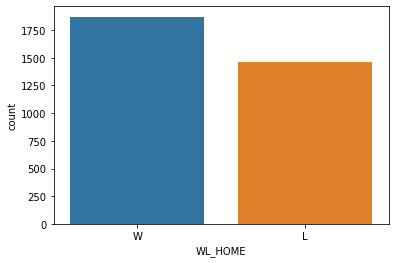

In [28]:
# Home Team Advantage
sns.countplot(dfhome["WL_HOME"])

In [29]:
dfhome["WL_HOME"].value_counts(normalize=True)

W    0.561056
L    0.438944
Name: WL_HOME, dtype: float64

/Users/mohammedghori/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Point Differential', ylabel='Density'>

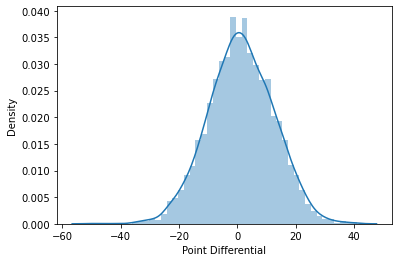

In [30]:
# Point differential (as measured Home - Away) is apporximately normally distributed
sns.distplot(dfhome["Point Differential"])

/Users/mohammedghori/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Point Differential', ylabel='Density'>

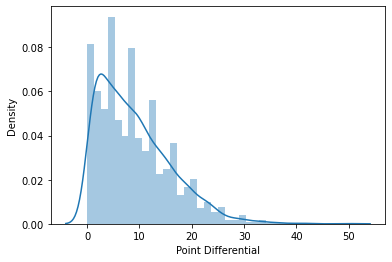

In [31]:
# As absolute values
sns.distplot(abs(dfhome["Point Differential"]))

In [32]:
dfhome[dfhome["Point Differential"].between(5,5)]["WL_HOME"].value_counts(normalize=True)

W    0.764151
L    0.235849
Name: WL_HOME, dtype: float64

,Point Differential,Ast Differential,DREB Differential,OREB Differential,Stl Differential,FTA Differential,Blk Differential,Tov Differential
count,3367.000000,3371.000000,3371.000000,3371.000000,3371.000000,3371.000000,3371.00000,3371.000000
mean,1.227502,0.417977,0.458321,0.122071,-0.083210,0.329576,0.09819,0.065114
std,11.267051,3.355078,3.744269,2.606487,1.976262,4.475663,1.73953,2.576858
min,-50.000000,-11.000000,-11.500000,-11.000000,-6.500000,-19.000000,-6.00000,-9.500000
25%,-6.000000,-2.000000,-2.000000,-1.500000,-1.500000,-2.500000,-1.00000,-1.500000
50%,1.000000,0.500000,0.500000,0.000000,0.000000,0.500000,0.00000,0.000000
75%,9.000000,2.500000,3.000000,2.000000,1.000000,3.500000,1.00000,2.000000
max,41.000000,13.000000,13.000000,9.000000,6.500000,17.500000,7.50000,11.000000


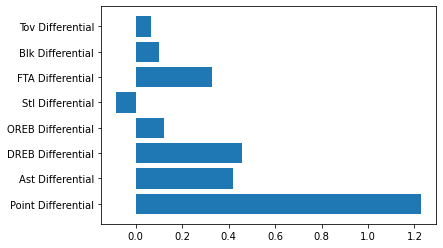

In [33]:
# Summary Statistics for all attributes
plt.barh(df_new.describe().columns, df_new.describe().iloc[1])
df_new.describe()
# make boxplots of as well using min->max data

<AxesSubplot:>

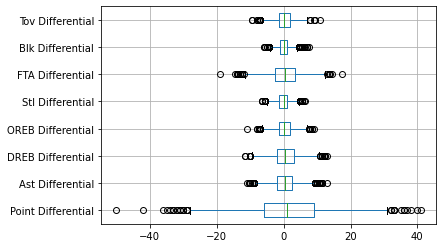

In [34]:
# Distribution of each attribute
df_new.boxplot(vert=False)

Creating Training and Testing Data

In [35]:
# Creating training and testing data
from sklearn.model_selection import train_test_split

In [36]:
X_train, X_test, y_train, y_test = train_test_split(df_new, dfhome["WL_HOME"], test_size=0.30, random_state=101)

Model #1: Logistic Regression

In [37]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

In [ ]:
log_preds = logmodel.predict(X_test)
log_acc = accuracy_score(y_test,log_preds)

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test,log_preds))

Model #2: Random Forest Classifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=100)
rfc.fit(X_train, y_train)

In [ ]:
rfc_preds = rfc.predict(X_test)
rfc_acc = accuracy_score(y_test,rfc_preds)

In [ ]:
print(classification_report(y_test,rfc_preds))

Model #3: Support Vector Machine

In [ ]:
from sklearn.svm import SVC
svm = SVC()
svm.fit(X_train,y_train)

In [ ]:
svm_preds = svm.predict(X_test)
svm_acc = accuracy_score(y_test,svm_preds)

In [ ]:
print(classification_report(y_test,svm_preds))

Model #4: K-Nearest Neighbors

In [ ]:
# Need to normalize variables, since they are different units and on different scales
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [ ]:
scaler.fit(df_new)

In [ ]:
scaled_features = scaler.transform(df_new)

In [ ]:
df_knn = pd.DataFrame(scaled_features,columns=df_new.columns)
df_knn.head()

In [ ]:
# Creating new trai/test splits off scaled data
X_train_scaled, X_test_scaled, y_train_scaled, y_test_scaled = train_test_split(df_knn, dfhome["WL_HOME"], test_size=0.30, random_state=101)

In [ ]:
# Initial model: K = 1
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train_scaled,y_train_scaled)

In [ ]:
knn_preds = knn.predict(X_test_scaled)

In [ ]:
print(classification_report(y_test,knn_preds))

In [ ]:
# Optimizing K

accuracy = []

for i in range(1,40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train_scaled,y_train_scaled)
    pred_i = knn.predict(X_test_scaled)
    acc_knn = accuracy_score(y_test_scaled, pred_i)
    accuracy.append(acc_knn)

In [ ]:
plt.figure(figsize=(10,5))
plt.plot(range(1,40),accuracy,color='black', marker='.',
         markerfacecolor='red', markersize=15)
plt.title('Accuracy vs. K Value')
plt.xlabel('K')
plt.ylabel('Accuracy')

The graph shows us that k-values after k = 15 seem to just randomly hover around an accuracy of 0.86. We prefer simpler models, so we will use K = 15. 

In [ ]:
knn_15 = KNeighborsClassifier(n_neighbors=15)
knn_15.fit(X_train_scaled,y_train_scaled)

In [ ]:
knn15_preds = knn.predict(X_test_scaled)
knn_acc = accuracy_score(y_test_scaled,knn15_preds)

In [ ]:
print(classification_report(y_test_scaled,knn15_preds))

Model #5: Gaussian Naive Bayes

In [ ]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()

In [ ]:
gnb.fit(X_train,y_train)

In [ ]:
gnb_preds = gnb.predict(X_test)
gnb_acc = accuracy_score(y_test,gnb_preds)

In [ ]:
print(classification_report(y_test,gnb_preds))

Model #6: AdaBoost Classifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
ada = AdaBoostClassifier()

In [ ]:
ada.fit(X_train, y_train)
ada_preds = ada.predict(X_test)
ada_acc = accuracy_score(y_test,ada_preds)

In [ ]:
print(classification_report(y_test,ada_preds))

In [ ]:
accuracies = [log_acc, rfc_acc, svm_acc, knn_acc, gnb_acc,ada_acc]
acc_df = pd.DataFrame({"Classifier": ["Logarithmic","Random Forest","Support Vector Machine", 
                                      "KNN","Gaussian Naive Bayes", "AdaBoost"],"Score": accuracies})

In [ ]:
acc_df.sort_values("Score", ascending=False)

Using Shapash to generate insights into logarithmic algorithm

In [ ]:
import shapash
from shapash.explainer.smart_explainer import SmartExplainer

In [ ]:
xpl = SmartExplainer()

In [ ]:
xpl.compile(
    x=X_test,
    model=logmodel.fit(X_train,y_train))

In [ ]:
app = xpl.run_app(title_story='Logarithmic Classififer')
